In [1]:
import heapq

def dijkstra_shortest_path(graph, start_node):
    """
    Implements an improved Dijkstra algorithm to find the shortest path in a weighted graph.
    :param graph: Dictionary where keys are node names and values are dictionaries of neighboring nodes and their distances.
    :param start_node: The starting node for the Dijkstra algorithm.
    :return: A dictionary with the shortest path to each node from the start_node.
    """
    # Priority queue to keep track of the minimum distance to each node
    priority_queue = [(0, start_node)]  # (distance, node)
    # Dictionary to store the minimum distance to each node
    min_distances = {node: float('inf') for node in graph}
    min_distances[start_node] = 0

    while priority_queue:
        # Get the node with the minimum distance
        current_distance, current_node = heapq.heappop(priority_queue)

        # If the current distance is greater than the recorded minimum, skip this node
        if current_distance > min_distances[current_node]:
            continue

        # Update the distances to neighboring nodes
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight

            # If a shorter path to the neighbor is found, update and push to the queue
            if distance < min_distances[neighbor]:
                min_distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    return min_distances

# Example graph setup
graph_example = {
    'Airport': {'Hospital_1': 40, 'Hospital_2': 19, 'Hospital_3': 27, 'Hospital_4': 39, 'Hospital_5': 40},
    'Hospital_1': {'Airport': 40, 'Hospital_2': 14, 'Hospital_3': 37, 'Hospital_4': 27, 'Hospital_5': 26},
    'Hospital_2': {'Airport': 19, 'Hospital_1': 14, 'Hospital_3': 32, 'Hospital_4': 15, 'Hospital_5': 16},
    'Hospital_3': {'Airport': 27, 'Hospital_1': 37, 'Hospital_2': 32, 'Hospital_4': 32, 'Hospital_5': 41},
    'Hospital_4': {'Airport': 39, 'Hospital_1': 27, 'Hospital_2': 15, 'Hospital_3': 32, 'Hospital_5': 15},
    'Hospital_5': {'Airport': 40, 'Hospital_1': 26, 'Hospital_2': 16, 'Hospital_3': 41, 'Hospital_4': 15}
}

# Running the Dijkstra algorithm to find the shortest paths from 'Airport'
shortest_paths_from_airport = dijkstra_shortest_path(graph_example, 'Airport')
print(shortest_paths_from_airport)


{'Airport': 0, 'Hospital_1': 33, 'Hospital_2': 19, 'Hospital_3': 27, 'Hospital_4': 34, 'Hospital_5': 35}


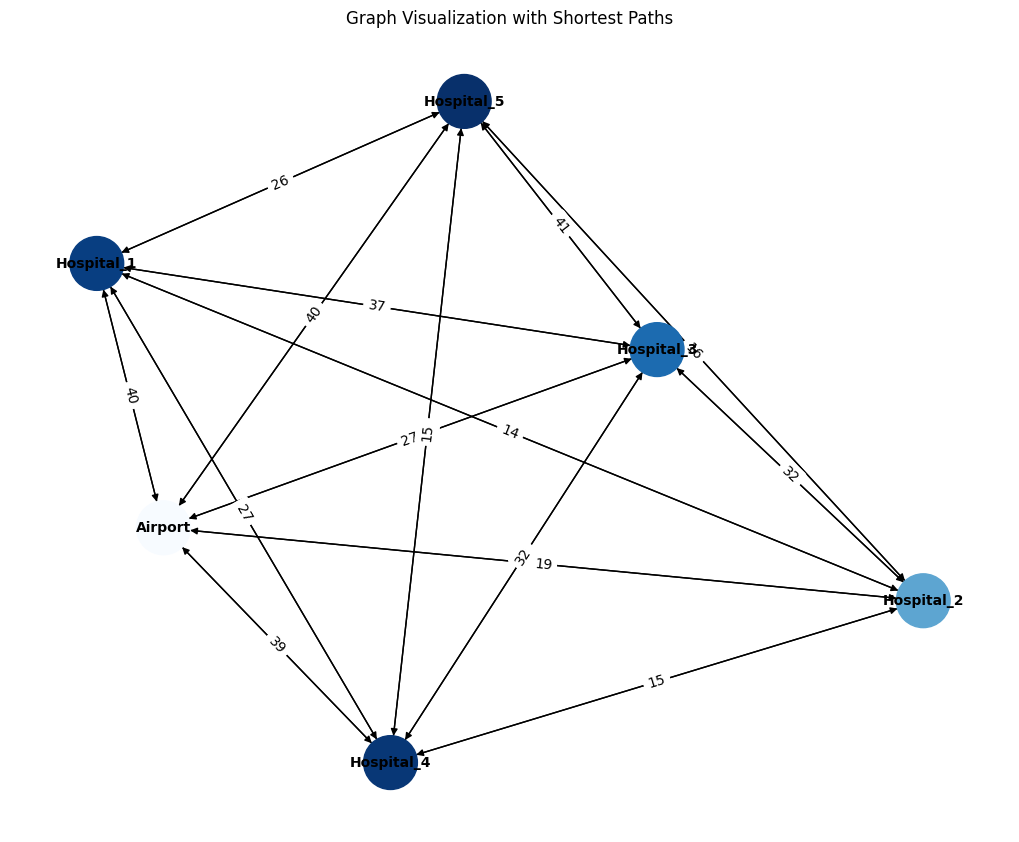

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph, shortest_paths):
    """
    Visualizes the graph using networkx and matplotlib.
    :param graph: The input graph as a dictionary.
    :param shortest_paths: The shortest path distances from the start node.
    """
    # Create a directed graph
    G = nx.DiGraph()

    # Add edges to the graph
    for node, edges in graph.items():
        for neighbor, weight in edges.items():
            G.add_edge(node, neighbor, weight=weight)

    # Set node colors based on shortest path distance
    node_colors = []
    max_distance = max(shortest_paths.values())
    for node in G.nodes:
        if shortest_paths[node] == float('inf'):
            node_colors.append('red')  # Unreachable nodes
        else:
            # Normalize the color based on the distance
            normalized_distance = shortest_paths[node] / max_distance
            node_colors.append(plt.cm.Blues(normalized_distance))  # Color map from blue

    # Get edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')

    # Draw the graph
    pos = nx.spring_layout(G)  # positions for all nodes
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1500, font_size=10, font_color='black', font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Graph Visualization with Shortest Paths")
    plt.show()

# Visualizing the example graph with shortest paths from 'Airport'
visualize_graph(graph_example, shortest_paths_from_airport)


In [3]:
from itertools import combinations, permutations

def construct_hospital_selection_matrix(hospitals):
    """
    Constructs a matrix representing all possible combinations of selected hospitals.
    :param hospitals: List of hospital names.
    :return: A matrix where rows represent hospitals and columns represent selection combinations.
    """
    total_hospitals = len(hospitals)
    matrix = []

    # Generate all possible combinations of hospitals to be supplied
    for r in range(1, total_hospitals + 1):
        for combo in combinations(range(total_hospitals), r):
            column = [1 if i in combo else 0 for i in range(total_hospitals)]
            matrix.append(column)

    return matrix

def generate_permutation_set(hospitals, selection_column):
    """
    Generates all permutations for a given selection of hospitals based on the selection column.
    :param hospitals: List of hospital names.
    :param selection_column: A list indicating which hospitals are selected (1 for selected, 0 otherwise).
    :return: List of permutations of selected hospitals.
    """
    selected_hospitals = [hospitals[i] for i, selected in enumerate(selection_column) if selected == 1]
    return list(permutations(selected_hospitals))

# Example hospital list
hospital_list = ['Hospital_1', 'Hospital_2', 'Hospital_3', 'Hospital_4', 'Hospital_5']
hospital_selection_matrix = construct_hospital_selection_matrix(hospital_list)

# Example to get permutations for a specific selection
selection_column_example = hospital_selection_matrix[2]
permutation_set = generate_permutation_set(hospital_list, selection_column_example)
print(hospital_selection_matrix)
print(permutation_set)


[[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1], [1, 1, 0, 0, 0], [1, 0, 1, 0, 0], [1, 0, 0, 1, 0], [1, 0, 0, 0, 1], [0, 1, 1, 0, 0], [0, 1, 0, 1, 0], [0, 1, 0, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 0, 1], [0, 0, 0, 1, 1], [1, 1, 1, 0, 0], [1, 1, 0, 1, 0], [1, 1, 0, 0, 1], [1, 0, 1, 1, 0], [1, 0, 1, 0, 1], [1, 0, 0, 1, 1], [0, 1, 1, 1, 0], [0, 1, 1, 0, 1], [0, 1, 0, 1, 1], [0, 0, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 1, 0, 1], [1, 1, 0, 1, 1], [1, 0, 1, 1, 1], [0, 1, 1, 1, 1], [1, 1, 1, 1, 1]]
[('Hospital_3',)]


In [4]:
def multiple_dynamic_programming_optimization(vehicle_capacity, hospital_demands, transport_times, max_rounds):
    """
    Implements the multiple dynamic programming algorithm to optimize the allocation of medical supplies.
    :param vehicle_capacity: The capacity of each vehicle for transporting supplies.
    :param hospital_demands: List of demands for each hospital.
    :param transport_times: Array of transportation times between hospitals and distribution centers.
    :param max_rounds: Maximum number of transportation rounds.
    :return: Optimal supply scheme and corresponding transportation time.
    """
    num_hospitals = len(hospital_demands)
    dp = {}

    # Initialize DP table
    for i in range(max_rounds + 1):
        for state in range(1 << num_hospitals):
            dp[(i, state)] = float('inf')
    dp[(0, 0)] = 0

    # DP calculation to find the optimal solution
    for round_num in range(1, max_rounds + 1):
        for state in range(1 << num_hospitals):
            if dp[(round_num - 1, state)] == float('inf'):
                continue

            for i in range(num_hospitals):
                if state & (1 << i):
                    continue

                new_state = state | (1 << i)
                supply_amount = min(vehicle_capacity, hospital_demands[i])
                time_cost = transport_times[i]

                dp[(round_num, new_state)] = min(dp[(round_num, new_state)],
                                                 dp[(round_num - 1, state)] + time_cost)

    # Minimum time to complete all supplies
    optimal_time = min(dp[(max_rounds, state)] for state in range(1 << num_hospitals) if state == (1 << num_hospitals) - 1)

    # Trace back to find the optimal supply scheme
    supply_scheme = []
    current_state = (1 << num_hospitals) - 1
    for round_num in range(max_rounds, 0, -1):
        for i in range(num_hospitals):
            if current_state & (1 << i):
                previous_state = current_state & ~(1 << i)
                time_cost = transport_times[i]
                if dp[(round_num - 1, previous_state)] + time_cost == dp[(round_num, current_state)]:
                    supply_scheme.append((round_num, i))
                    current_state = previous_state
                    break

    supply_scheme.reverse()
    return optimal_time, supply_scheme

# Example data for testing
vehicle_capacity_example = 30
hospital_demands_example = [50, 30, 40, 20, 10]
transport_times_example = [33, 19, 27, 34, 35]
max_transport_rounds = 5

# Running the optimization
optimal_time, optimal_supply_scheme = multiple_dynamic_programming_optimization(
    vehicle_capacity_example,
    hospital_demands_example,
    transport_times_example,
    max_transport_rounds
)

print("Optimal Time:", optimal_time)
print("Optimal Supply Scheme:", optimal_supply_scheme)


Optimal Time: 148
Optimal Supply Scheme: [(1, 4), (2, 3), (3, 2), (4, 1), (5, 0)]


In [5]:
import numpy as np
from ortools.linear_solver import pywraplp
from collections import defaultdict
import math

# Define your depot coordinates
depot = (41.78228, 71.65713)

def gis_distance(point1, point2):
    """
    This function calculates the geographical distance between two points
    using the Haversine formula.
    """
    lat1, lon1 = math.radians(point1[0]), math.radians(point1[1])
    lat2, lon2 = math.radians(point2[0]), math.radians(point2[1])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    # Radius of Earth in kilometers
    R = 6371

    # Calculate and return the geographical distance in kilometers
    return c * R

def solve_problem_1(centers, max_capacity_per_vehicle):
    # Sort the centers based on their distance to the depot and their capacity
    centers.sort(key=lambda center: (gis_distance(depot, center[0]), -center[1]))

    # Initialize the total amount of medical supplies that can be transported
    total_medical_supplies = 0

    # Iteratively add centers to the subset until you cannot transport any more medical supplies
    selected_centers = []
    for center in centers:
        if total_medical_supplies + center[1] <= max_capacity_per_vehicle:
            selected_centers.append(center)
            total_medical_supplies += center[1]
        else:
            break

    return selected_centers

def solve_problem_2(medical_supplies_per_center, medical_materials_demand_per_hospital, max_capacity_per_vehicle, transportation_times):
    solver = pywraplp.Solver.CreateSolver('GLOP')

    # Create variables for supply quantities
    supply_quantities = defaultdict(int)
    for center in medical_supplies_per_center:
        for hospital in medical_materials_demand_per_hospital:
            supply_quantities[(center, hospital)] = solver.NumVar(0, max_capacity_per_vehicle, '')

    # Create objective function: minimize the total transportation cost
    total_transportation_cost = solver.Sum([transportation_times[(center, hospital)] * supply_quantities[(center, hospital)] for center in medical_supplies_per_center for hospital in medical_materials_demand_per_hospital])
    solver.Minimize(total_transportation_cost)

    # Constraints: meet the medical materials demand at each hospital
    for hospital in medical_materials_demand_per_hospital:
        solver.Add(solver.Sum([supply_quantities[(center, hospital)] for center in medical_supplies_per_center]) >= medical_materials_demand_per_hospital[hospital])

    # Constraints: supply no more than the total amount of medical supplies at each center
    for center in medical_supplies_per_center:
        solver.Add(solver.Sum([supply_quantities[(center, hospital)] for hospital in medical_materials_demand_per_hospital]) <= medical_supplies_per_center[center])

    status = solver.Solve()
    if status == pywraplp.Solver.OPTIMAL:
        result = {(center, hospital): supply_quantities[(center, hospital)].solution_value() for center in medical_supplies_per_center for hospital in medical_materials_demand_per_hospital}
        return result
    else:
        raise Exception('The problem does not have an optimal solution.')

# Example data for Problem 1: Centers and their available capacities
centers = [
    ((37.7749, -122.4194), 100),  # Center 1 coordinates and capacity
    ((34.0522, -118.2437), 80),   # Center 2 coordinates and capacity
]

max_capacity_per_vehicle = 100  
selected_centers = solve_problem_1(centers, max_capacity_per_vehicle)
print(f"GIS Distance between Center 1 and Center 2: {gis_distance((37.7749, -122.4194), (34.0522, -118.2437)):.2f} km")
print("Selected centers for Problem 1:", selected_centers)

# Example data for Problem 2: Medical supplies and demand at hospitals
medical_supplies_per_center = {
    'Center A': 100,
    'Center B': 80,
}

medical_materials_demand_per_hospital = {
    'Hospital X': 50,
    'Hospital Y': 70,
}

# Example transportation times (in arbitrary units, can be GIS distances or other times)
transportation_times = {
    ('Center A', 'Hospital X'): 33,
    ('Center A', 'Hospital Y'): 27,
    ('Center B', 'Hospital X'): 19,
    ('Center B', 'Hospital Y'): 35,
}

# Solving Problem 2
selected_supply_allocation = solve_problem_2(medical_supplies_per_center, medical_materials_demand_per_hospital, max_capacity_per_vehicle, transportation_times)
print("\nSelected supply allocation for Problem 2:", selected_supply_allocation)


GIS Distance between Center 1 and Center 2: 559.12 km
Selected centers for Problem 1: [((37.7749, -122.4194), 100)]

Selected supply allocation for Problem 2: {('Center A', 'Hospital X'): 0.0, ('Center A', 'Hospital Y'): 70.0, ('Center B', 'Hospital X'): 50.0, ('Center B', 'Hospital Y'): 0.0}


Multi-Objective Optimization (Cost vs. Time)

This approach optimizes both the transportation time and cost in a multi-objective optimization model. We'll modify the objective function to minimize the weighted sum of time and cost.

In [6]:
from ortools.linear_solver import pywraplp

def solve_multi_objective(medical_supplies_per_center, medical_materials_demand_per_hospital, max_capacity_per_vehicle, transportation_times, costs):
    solver = pywraplp.Solver.CreateSolver('GLOP')

    # Create variables for supply quantities
    supply_quantities = {}
    for center in medical_supplies_per_center:
        for hospital in medical_materials_demand_per_hospital:
            supply_quantities[(center, hospital)] = solver.NumVar(0, max_capacity_per_vehicle, '')

    # Create the objective function: minimize both transportation time and cost
    total_transportation_time = solver.Sum([transportation_times[(center, hospital)] * supply_quantities[(center, hospital)] for center in medical_supplies_per_center for hospital in medical_materials_demand_per_hospital])
    total_transportation_cost = solver.Sum([costs[(center, hospital)] * supply_quantities[(center, hospital)] for center in medical_supplies_per_center for hospital in medical_materials_demand_per_hospital])

    # Weight time and cost equally (you can change the weights as needed)
    solver.Minimize(0.5 * total_transportation_time + 0.5 * total_transportation_cost)

    # Constraints: meet the medical materials demand at each hospital
    for hospital in medical_materials_demand_per_hospital:
        solver.Add(solver.Sum([supply_quantities[(center, hospital)] for center in medical_supplies_per_center]) >= medical_materials_demand_per_hospital[hospital])

    # Constraints: supply no more than the total amount of medical supplies at each center
    for center in medical_supplies_per_center:
        solver.Add(solver.Sum([supply_quantities[(center, hospital)] for hospital in medical_materials_demand_per_hospital]) <= medical_supplies_per_center[center])

    status = solver.Solve()
    if status == pywraplp.Solver.OPTIMAL:
        result = {(center, hospital): supply_quantities[(center, hospital)].solution_value() for center in medical_supplies_per_center for hospital in medical_materials_demand_per_hospital}
        return result
    else:
        raise Exception('The problem does not have an optimal solution.')

# Example transportation times (in arbitrary units) and costs
transportation_times = {
    ('Center A', 'Hospital X'): 33,
    ('Center A', 'Hospital Y'): 27,
    ('Center B', 'Hospital X'): 19,
    ('Center B', 'Hospital Y'): 35,
}

costs = {
    ('Center A', 'Hospital X'): 100,  # Example cost in monetary units
    ('Center A', 'Hospital Y'): 120,
    ('Center B', 'Hospital X'): 90,
    ('Center B', 'Hospital Y'): 150,
}

# Example medical supply and demand data
medical_supplies_per_center = {
    'Center A': 100,
    'Center B': 80,
}

medical_materials_demand_per_hospital = {
    'Hospital X': 50,
    'Hospital Y': 70,
}

max_capacity_per_vehicle = 100

# Solving the multi-objective problem
selected_supply_allocation = solve_multi_objective(medical_supplies_per_center, medical_materials_demand_per_hospital, max_capacity_per_vehicle, transportation_times, costs)
print("Selected supply allocation:", selected_supply_allocation)


Selected supply allocation: {('Center A', 'Hospital X'): 0.0, ('Center A', 'Hospital Y'): 70.0, ('Center B', 'Hospital X'): 50.0, ('Center B', 'Hospital Y'): 0.0}


 Decentralized Optimization (Collaborative Supply Chains)

In [7]:
from ortools.linear_solver import pywraplp

def decentralized_optimization(hospitals, centers, medical_supplies_per_center, medical_materials_demand_per_hospital, max_capacity_per_vehicle):
    solver = pywraplp.Solver.CreateSolver('GLOP')

    # Each center optimizes independently
    center_decisions = {}

    for center in centers:
        # Solve only for this center
        supply_quantities = {hospital: solver.NumVar(0, max_capacity_per_vehicle, '') for hospital in hospitals}

        # Minimize transportation time for this center
        total_time = solver.Sum([transportation_times[(center, hospital)] * supply_quantities[hospital] for hospital in hospitals])
        solver.Minimize(total_time)

        # Constraints: meet the demand from this center's perspective
        for hospital in hospitals:
            solver.Add(supply_quantities[hospital] >= medical_materials_demand_per_hospital[hospital] / len(centers))  # Assumption: split demands equally

        # Add a constraint for the center's supply
        solver.Add(solver.Sum([supply_quantities[hospital] for hospital in hospitals]) <= medical_supplies_per_center[center])

        status = solver.Solve()
        if status == pywraplp.Solver.OPTIMAL:
            center_decisions[center] = {hospital: supply_quantities[hospital].solution_value() for hospital in hospitals}
        else:
            raise Exception('No optimal solution for center', center)

    return center_decisions

# Example of running decentralized optimization
hospitals = ['Hospital X', 'Hospital Y']
centers = ['Center A', 'Center B']
center_decisions = decentralized_optimization(hospitals, centers, medical_supplies_per_center, medical_materials_demand_per_hospital, max_capacity_per_vehicle)
print("Decentralized decisions:", center_decisions)


Decentralized decisions: {'Center A': {'Hospital X': 25.0, 'Hospital Y': 35.0}, 'Center B': {'Hospital X': 25.0, 'Hospital Y': 35.0}}
